#  ZOMATO PROJECT API

In [2]:
import pandas as pd #to make dataframe
import matplotlib.pyplot as plt
df=pd.read_csv('zomato.csv',encoding='latin-1')  #encoding utf-2 and utf-8 shows error as some are latin words
df.head()
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

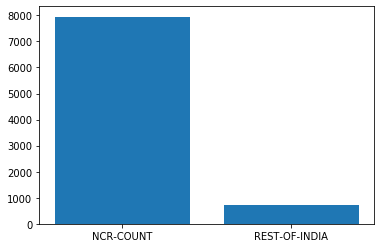

In [3]:
def getcount(data):
    data_new_delhi=data[data['City']=='New Delhi']['City'].count()
    data_ghaziabad=data[data['City']=='Ghaziabad']['City'].count()
    data_noida=data[data['City']=='Noida']['City'].count()
    data_gurgaon=data[data['City']=='Gurgaon']['City'].count()
    data_faridabad=data[data['City']=='Faridabad']['City'].count()
    ncr_count=data_new_delhi+data_ghaziabad+data_noida+data_gurgaon+data_faridabad
    total_india=data['City'].count()
    return ncr_count,total_india-ncr_count

df.dropna(inplace=True)
df.reset_index(inplace=True)
del df['index']
data_india=df[df['Country Code']==1]
ncr_count,rest_count=getcount(data_india)
y=[ncr_count,rest_count]
x=['NCR-COUNT','REST-OF-INDIA']
plt.bar(x,y)
plt.show()

In [4]:
target=['New Delhi','Ghaziabad','Faridabad','Noida','Gurgaon']
ncr_cuisines=list(data_india[(data_india['City']=='New Delhi') | (data_india['City']=='Noida')|(data_india['City']=='Ghaziabad')|(data_india['City']=='Gurgaon') | (data_india['City']=='Faridabad')]['Cuisines'])
NCR_CUISINES=[]
for ele in ncr_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
        NCR_CUISINES.append(i)
        
NCR_CUISINES=list(set(NCR_CUISINES))

rest_cuisines=list(data_india[(data_india['City']!='New Delhi') | (data_india['City']!='Noida')|(data_india['City']!='Ghaziabad')|(data_india['City']!='Gurgaon') | (data_india['City']!='Faridabad')]['Cuisines'])
REST_CUISINES_NOT_NCR=[]
for ele in rest_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for y in li:
        if y not in NCR_CUISINES:
            REST_CUISINES_NOT_NCR.append(y)
print("-----------------------------------------------------------------------------------------------------")
print()
print('Cuisines that are in NCR but not in rest of india are as follows : -')
print()
for ele in REST_CUISINES_NOT_NCR:
    print(ele)
print()
print("------------------------------------------------------------------------------------------------------")

TOTAL_CUISINES=NCR_CUISINES+REST_CUISINES_NOT_NCR
##using zomato api 


-----------------------------------------------------------------------------------------------------

Cuisines that are in NCR but not in rest of india are as follows : -

German
Malwani
German
BBQ
Cajun

------------------------------------------------------------------------------------------------------


In [15]:
data_india[data_india['City']=='New Delhi']

2551     0.000000
2552    77.196923
2553    77.197475
2554    77.198033
2555    77.196924
          ...    
8019    77.285065
8020    77.283827
8021    77.279779
8022    77.278543
8023    77.285696
Name: Longitude, Length: 5473, dtype: float64

In [5]:
import requests,json
header={'Accept':'application/json','user-key':'d35451bc6dc04b3662194e3fce301ced'}
response=requests.get('https://api.zomato.com/v2.1/cities',params={'q':'delhi'},headers=header)
response=response.json()
city_id=response['location_suggestions'][0]['id']
response=requests.get('https://api.zomato.com/v2.1/cuisines',params={'city_id':city_id},headers=header)
response=response.json()
li=[]
for i in range(len(response['cuisines'])):
    li.append(response['cuisines'][i]['cuisine']['cuisine_name'])
li=set(li)
l=set(REST_CUISINES_NOT_NCR).difference(li)
print('--------------------------------------------------------------------------------------------------')
print('Cuisines which are in ncr through zomato api but not in rest in india by dataset are')
for ele in list(l):
    print(ele)
print('--------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------
Cuisines which are in ncr through zomato api but not in rest in india by dataset are
Cajun
German
--------------------------------------------------------------------------------------------------


In [6]:
data_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
615,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
616,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
617,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
618,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
619,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


------------------------------------------------------------------------------------------------------
Top 10 cuisines present in DELHI NCR are as follows 
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Top 10 cuisines present in REST IN INDIA are as follows 
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50
------------------------------------------------------------------------------------------------------


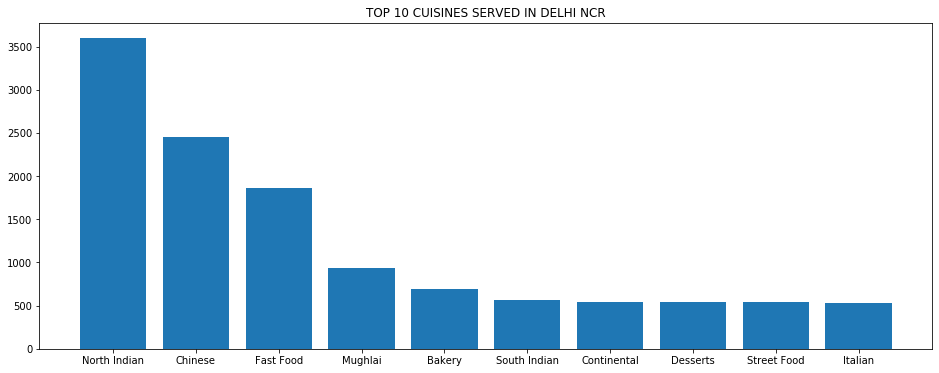

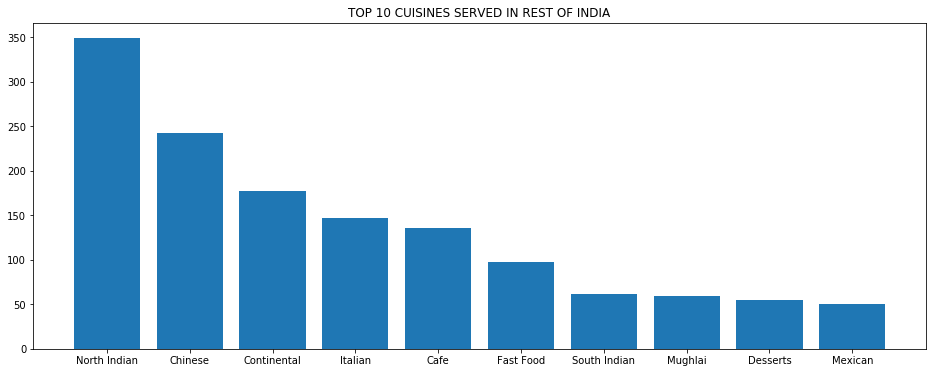

In [7]:
l=list(zip(data_india['City'],data_india['Cuisines']))
target=['New Delhi','Noida','Gurgaon','Faridabad','Ghaziabad']
d={}
for i in range(len(l)):
    if l[i][0] in target:
        for x in l[i][1].split(','):
            x=x.strip()
            d[x]=d.get(x,0)+1
d=dict(sorted(d.items(),key= lambda  kv :(kv[1],kv[0]),reverse=True))
print('------------------------------------------------------------------------------------------------------')
print('Top 10 cuisines present in DELHI NCR are as follows ')
i=0
x_ncr=[]
y_ncr=[]
for key,val in d.items():
    if i==10:
        break
    x_ncr.append(key)
    y_ncr.append(val)
    print(key,val)
    i+=1
print('------------------------------------------------------------------------------------------------------')
d={}
x_rest=[]
y_rest=[]
for i in range(len(l)):
    if l[i][0] not in target:
        for x in l[i][1].split(','):
            x=x.strip()
            d[x]=d.get(x,0)+1
d=dict(sorted(d.items(),key= lambda  kv :(kv[1],kv[0]),reverse=True))
print('------------------------------------------------------------------------------------------------------')
print('Top 10 cuisines present in REST IN INDIA are as follows ')
i=0
for key,val in d.items():
    if i==10:
        break
    x_rest.append(key)
    y_rest.append(val)
    print(key,val)
    i+=1
print('------------------------------------------------------------------------------------------------------')

plt.subplots(figsize=(16,6))
plt.title('TOP 10 CUISINES SERVED IN DELHI NCR')
plt.bar(x_ncr,y_ncr)
plt.show()

plt.subplots(figsize=(16,6))
plt.title('TOP 10 CUISINES SERVED IN REST OF INDIA')
plt.bar(x_rest,y_rest)

plt.show()


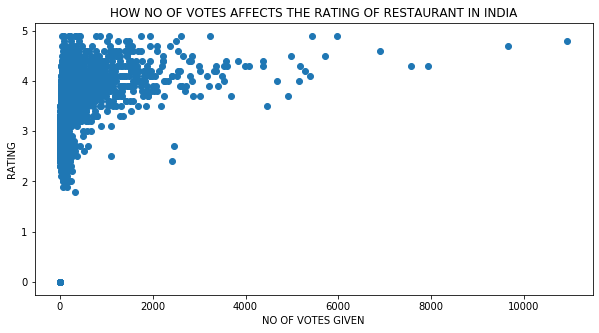

In [8]:
l=list(zip(data_india['Aggregate rating'],data_india['Votes']))
y=[ele[0] for ele in l]
x=[ele[1] for ele in l]
plt.subplots(figsize=(10,5))
plt.ylabel('RATING')
plt.xlabel('NO OF VOTES GIVEN')
plt.title('HOW NO OF VOTES AFFECTS THE RATING OF RESTAURANT IN INDIA')
plt.scatter(x,y)
plt.show()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


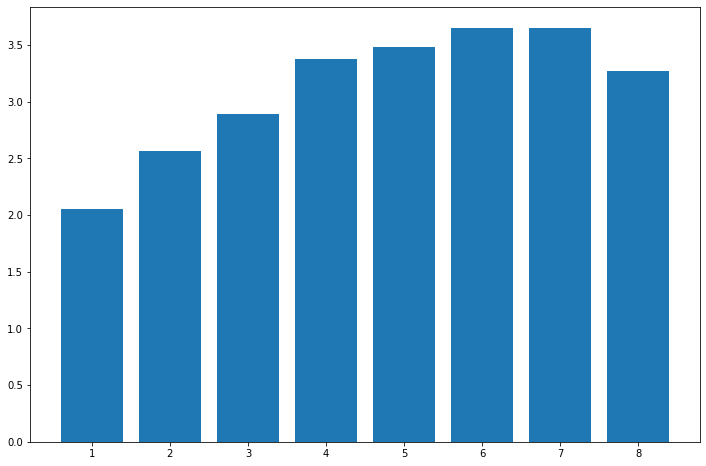

In [109]:
def f(data):
    li=data.split(',')
    return(len(li))
    

data_india['count']=data_india['Cuisines'].apply(f)
get_count=data_india['count'].value_counts()

li=list(zip(data_india['Aggregate rating'],data_india['count']))
d={}
x=[]
y=[]
for ele in li:
    if ele[1] not in d:
        d[ele[1]]=[ele[0]]
    else:
        d[ele[1]].append(ele[0])
for key in d:
    d[key]=sum(d[key])/len(d[key])
for key in d:
    x.append(key)
    y.append(d[key])
plt.subplots(figsize=(12,8))
plt.xlabel('No of cuisines delivered')
plt.ylabel('')
plt.bar(x,y)
plt.show()

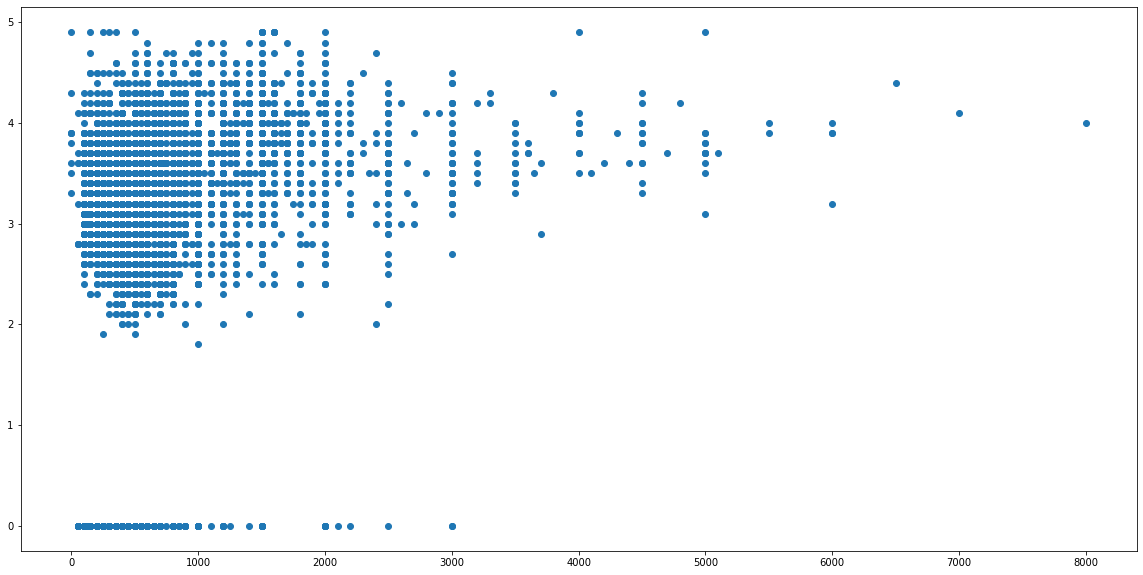

In [28]:
l=list(zip(data_india['Aggregate rating'],data_india['Average Cost for two']))
x=[]
y=[]
for i in range(len(l)):
    x.append(l[i][0])
    y.append(l[i][1])
plt.subplots(figsize=(20,10))
plt.scatter(y,x)
plt.show()

In [37]:
data_india['Cuisines'].value_counts()
d={}
for ele in data_india['Cuisines']:
    li=[x.strip() for x in ele.split(',')]
    for v in li:
        d[v]=d.get(v,0)+1
        
d=dict(sorted(d.items(),key= lambda kv :(kv[1],kv[0]),reverse=True))
i=0
cuisines=[]

print('---------------------------------------------------------------------------------------------------------------')
print('TOP 15 CUISINES SERVED IN MOST RESTAURANTS OF INDIA ')

for ele in d:
    if i==15:
        break
    cuisines.append(ele)
    print('{:<16s}|{:>11d}'.format(ele,d[ele]))
    i+=1
print('---------------------------------------------------------------------------------------------------------------')
  


---------------------------------------------------------------------------------------------------------------
TOP 15 CUISINES SERVED IN MOST RESTAURANTS OF INDIA 
North Indian    |       3946
Chinese         |       2690
Fast Food       |       1963
Mughlai         |        992
Bakery          |        726
Continental     |        724
Italian         |        682
South Indian    |        631
Cafe            |        627
Desserts        |        597
Street Food     |        554
Mithai          |        380
Pizza           |        313
American        |        225
Ice Cream       |        216
---------------------------------------------------------------------------------------------------------------


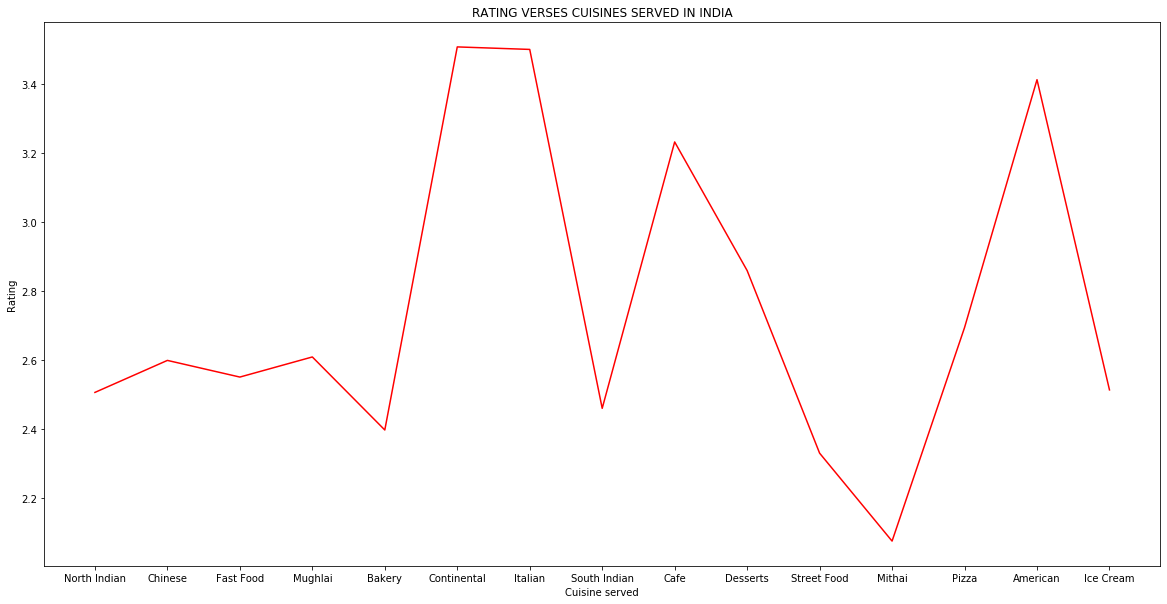

In [48]:
l=list(zip(data_india['Cuisines'],data_india['Aggregate rating']))
d={}
for curr in cuisines:
    sum=0
    count=0
    for i in range(len(l)):
        if curr in l[i][0]:
            sum+=l[i][1]
            count+=1
    d[curr]=(sum/count)
x=[]
y=[]
for curr in d:
    x.append(curr)
    y.append(d[curr])
plt.subplots(figsize=(20,10))
plt.title('RATING VERSES CUISINES SERVED IN INDIA')
plt.xlabel('Cuisine served')
plt.ylabel('Rating')
plt.plot(x,y,color='red')
plt.show()

---------------------------------------------------------------------------------------------
                          TOP 10 LOCALITIES HAVING BEST RATING                               

Hotel Clarks Amer, Malviya Nagar        |            4.90
Aminabad                                |            4.90
Friends Colony                          |            4.89
Powai                                   |            4.84
Kirlampudi Layout                       |            4.82
Express Avenue Mall,  Royapettah        |            4.80
Deccan Gymkhana                         |            4.80
Banjara Hills                           |            4.72
Sector 5, Salt Lake                     |            4.71
Riverside Mall, Gomti Nagar             |            4.70
---------------------------------------------------------------------------------------------


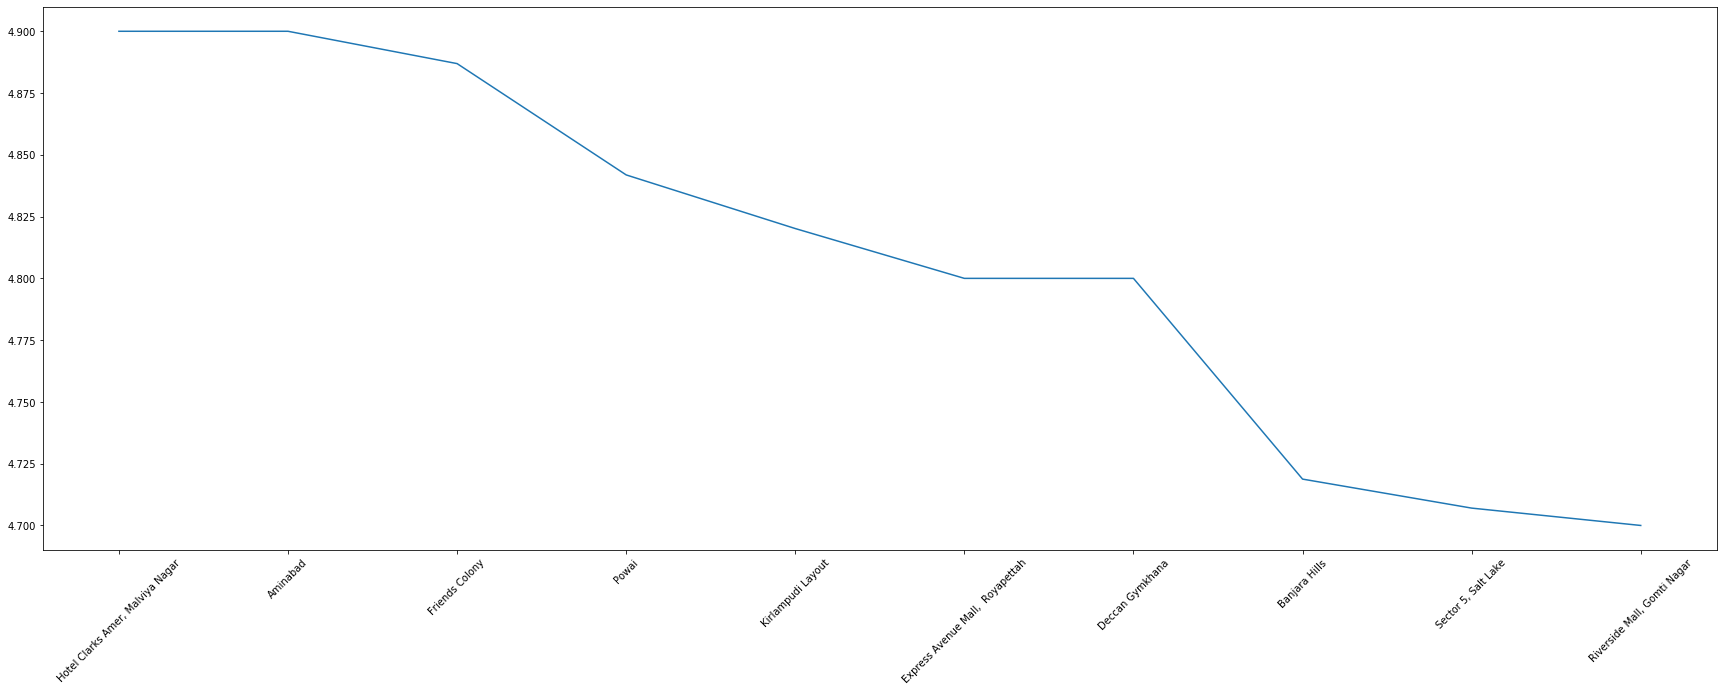

In [101]:

data_india=data_india.copy()
data_india['weighted_average']=data_india['Votes']*data_india['Aggregate rating']
l=list(zip(data_india['Locality'],data_india['weighted_average']))
s=data_india['Votes'].sum()
d={}
ind=[ele[0] for ele in l]
for val in ind:
    key=data_india[data_india['Locality']==val]['weighted_average'].sum()
    v=data_india[data_india['Locality']==val]['Votes'].sum()
    if v==0:
        continue
    d[val]=(key/v)

d=dict(sorted(d.items(),key= lambda kv:(kv[1],kv[0]),reverse=True))
i=0
print('---------------------------------------------------------------------------------------------')
print('                          TOP 10 LOCALITIES HAVING BEST RATING                               ')
print()
x=[]
y=[]
for key in d:
    if i==10:
        break
    x.append(key)
    y.append(d[key])
    print('{:<40s}|{:>16s}'.format(key,'{:.2f}'.format(d[key])))
    i+=1
print('---------------------------------------------------------------------------------------------')


plt.subplots(figsize=(30,10))
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

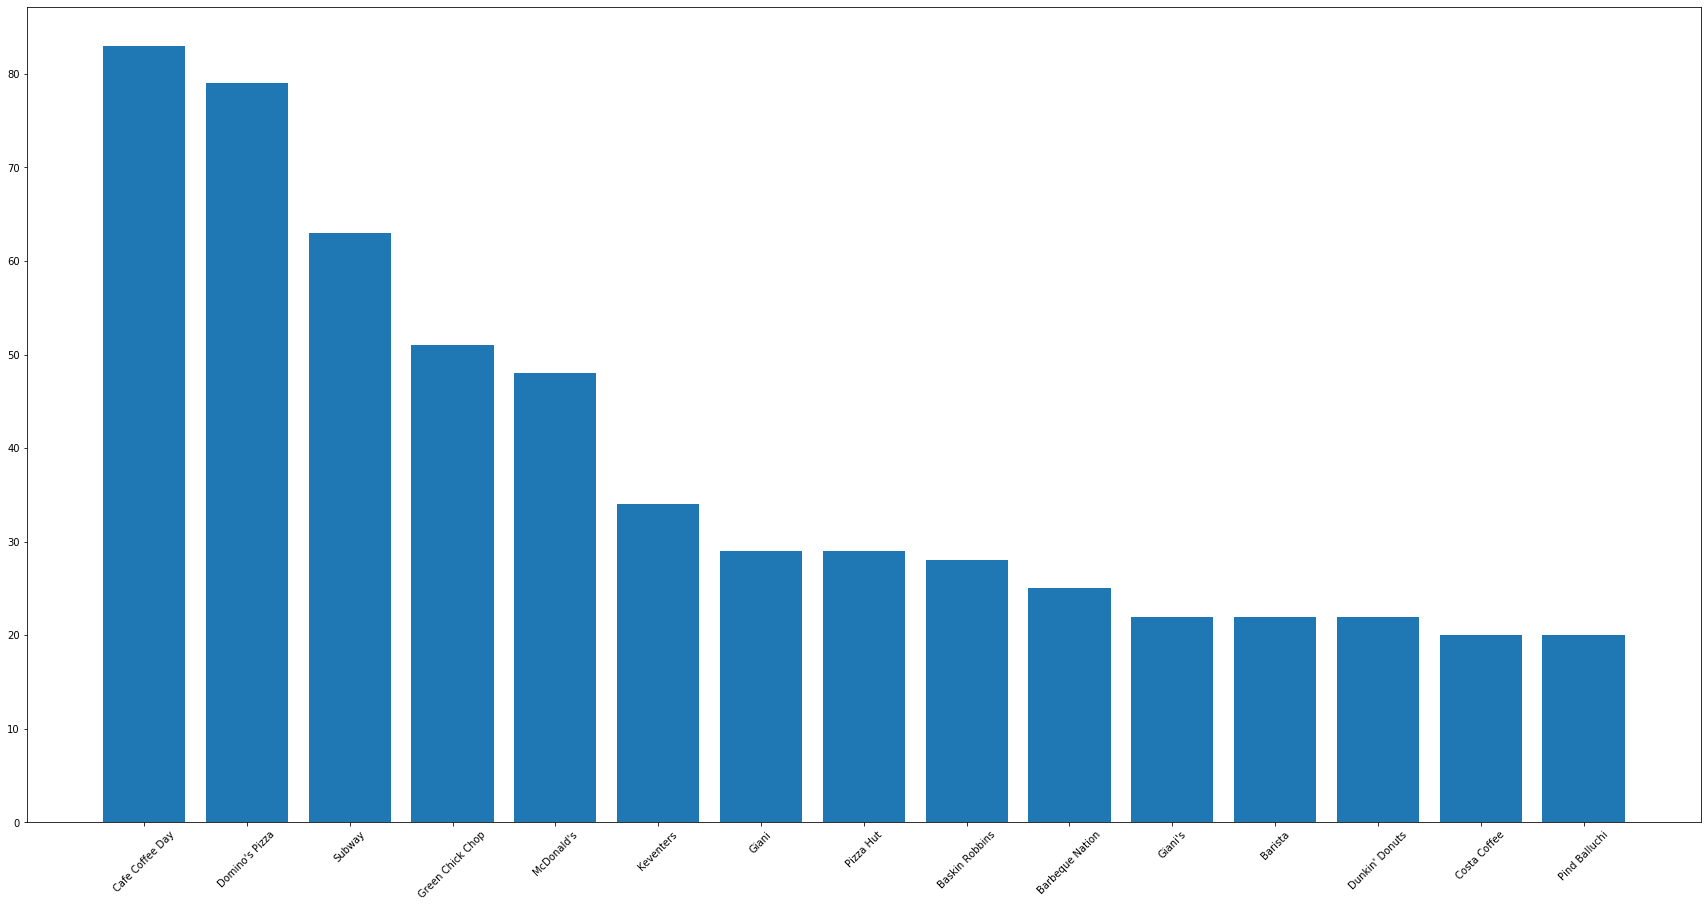

In [99]:
d=data_india['Restaurant Name'].value_counts()
x=list(d.index[0:15])
y=list(d.values[0:15])
plt.subplots(figsize=(30,15))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

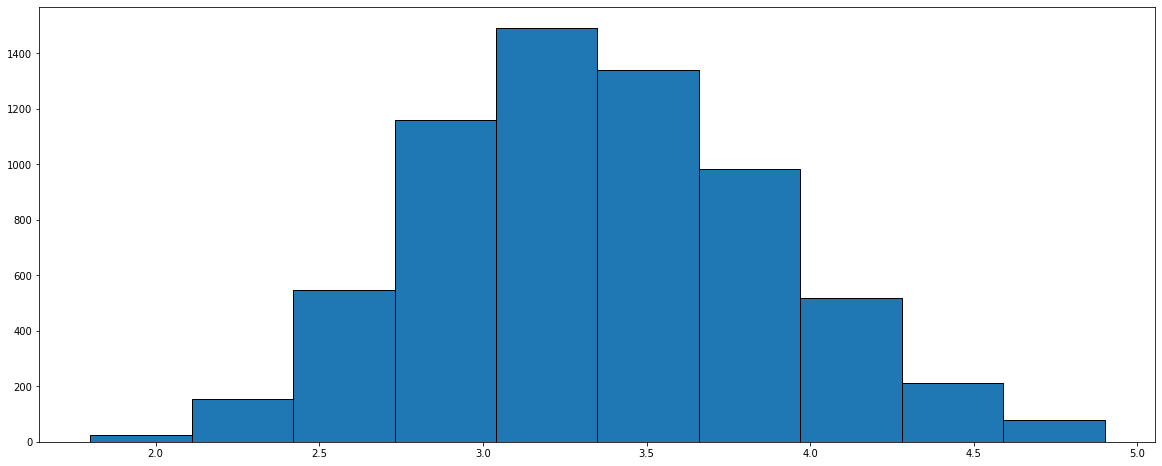

In [109]:
data=data_india[data_india['Aggregate rating']!=0]
x=list(data['Aggregate rating'])
plt.subplots(figsize=(20,8))
plt.hist(x,edgecolor='black')
plt.show()


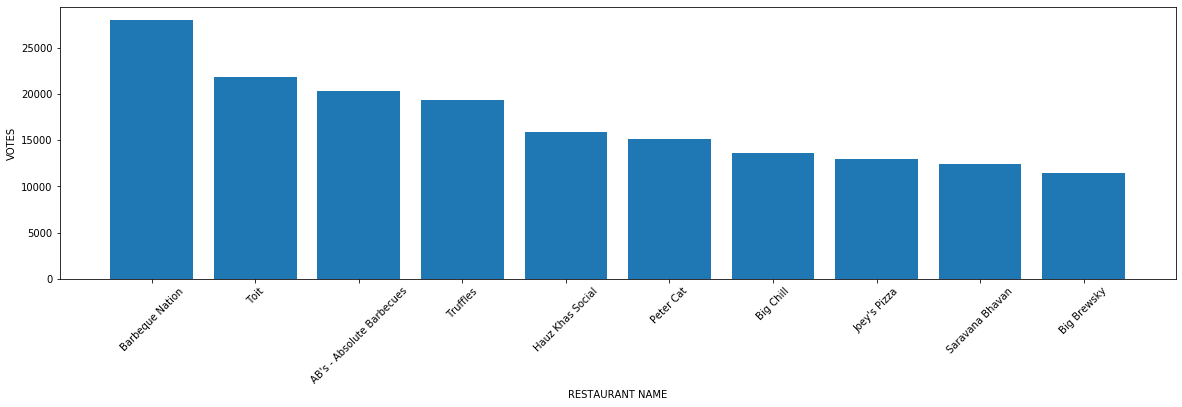

In [134]:
l=list(zip(data_india['Restaurant Name'],data_india['Votes']))
d={}
for i in range(len(l)):
    d[l[i][0]]=d.get(l[i][0],l[i][1])+l[i][1]
d=dict(sorted(d.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))
x=list(d.values())[0:10]
y=list(d.keys())[0:10]
plt.subplots(figsize=(20,5))
plt.bar(y,x)
plt.xlabel('RESTAURANT NAME')
plt.ylabel('VOTES')
plt.xticks(rotation=45)
plt.show()

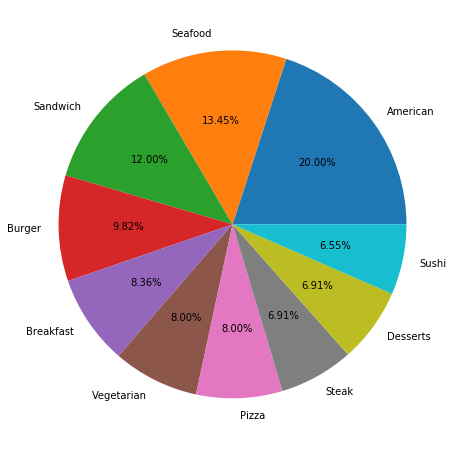

In [146]:
d=df[df['Country Code']==216]
x=d['Cuisines'].value_counts()
dic={}
for ele in list(x.index):
    li=[y.strip() for y in ele.split(',')]
    for y in li:
        dic[y]=dic.get(y,0)+1
dic=dict(sorted(dic.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))
y=list(dic.values())[0:10]
x=list(dic.keys())[0:10]
plt.subplots(figsize=(20,8))
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

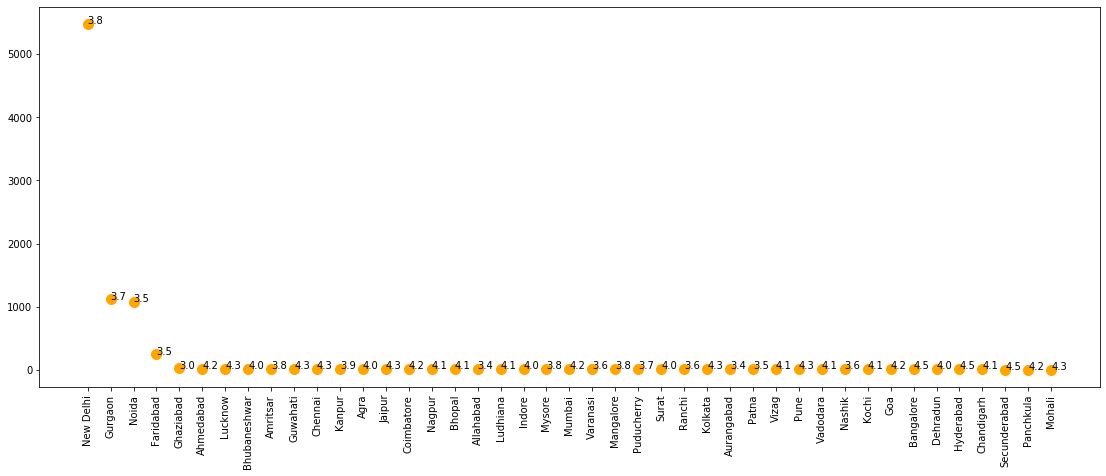

In [166]:
li=data_india['City'].value_counts()
x=list(li.index)
y=list(li.values)
z=[]
d={}
for ele in x:
    a=data_india[data_india['City']==ele]['weighted_average'].sum()
    b=data_india[data_india['City']==ele]['Votes'].sum()
    val=(a/b)
    z.append(val)
    d[ele]=d.get(ele,val)+val
for ele in d:
    d[ele]=round(d[ele],1)
plt.subplots(figsize=(19,7))
plt.scatter(x,y,s=100,color='orange')
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(x[i],y[i],round(z[i],1))
plt.show()